In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from models.models import svm_model, logistic_regression_model, random_forest_model, lstm_model, load_model

In [3]:
dataset = pd.read_csv('data/hrv_dataset.csv')

In [4]:
dataset.head()

,Age,Gender,Height,Weight,BMI,BF%,Visceral fat,RHR,Test_time,Hrmax,...,HF_H,LF_HF_Ratio_H,Total power_H,SDNN_P,RMSSD_p,Pnn50_P,LF_P,HF_P,LF_HF_Ratio_P,Total power_P
0,20,1,174.0,79.9,26.4,22.2,5,72,11.50,191,...,393.5,1.130,1938.0,34.30,25.47,3.74,431.1,408.1,1.05,1548.0
1,20,2,156.0,63.9,26.3,33.0,3,73,10.25,194,...,807.1,0.289,1791.0,33.68,40.88,26.02,117.6,919.1,0.12,1184.0
2,21,2,156.0,67.1,27.6,32.1,3,81,9.25,183,...,1171.0,0.510,2808.0,50.13,52.81,25.81,2376.0,5538.0,0.43,9817.0
3,24,1,169.0,75.5,26.4,23.5,6,69,12.50,185,...,259.2,0.930,906.2,31.08,29.22,8.54,288.7,528.0,0.54,965.4
4,23,1,169.0,81.0,28.4,24.1,7,72,12.10,186,...,398.0,1.090,1963.0,26.44,28.97,8.98,468.1,1785.0,0.26,2656.0


In [5]:
hrv_data = dataset[['Age', 'Gender', 'SDNN_P']]

In [6]:
hrv_data.head()

,Age,Gender,SDNN_P
0,20,1,34.30
1,20,2,33.68
2,21,2,50.13
3,24,1,31.08
4,23,1,26.44


In [7]:
hrv_dataframe = pd.DataFrame(hrv_data)

In [8]:
def assign_stress_label(age, gender, sdnn):
    if age >= 18 and age <= 24:
        if sdnn > 50:
            return "Stress"
        elif 35 < sdnn <= 50:
            return "Mild Stress"
        else:
            return "No Stress"
    elif age >= 25 and age <= 34:
        if sdnn > 60:
            return "Stress"
        elif 45 < sdnn <= 60:
            return "Mild Stress"
        else:
            return "No Stress"
    elif age >= 35 and age <= 44:
        if sdnn > 40:
            return "Stress"
        elif 30 < sdnn <= 40:
            return "Mild Stress"
        else:
            return "No Stress"
    # if age >= 18 and age <= 24:
    #     if sdnn > 50:
    #         return "No Stress"
    #     elif 35 < sdnn <= 50:
    #         return "Mild Stress"
    #     else:
    #         return "Stress"
    # elif age >= 25 and age <= 34:
    #     if sdnn > 60:
    #         return "No Stress"
    #     elif 45 < sdnn <= 60:
    #         return "Mild Stress"
    #     else:
    #         return "Stress"
    # elif age >= 35 and age <= 44:
    #     if sdnn > 40:
    #         return "No Stress"
    #     elif 30 < sdnn <= 40:
    #         return "Mild Stress"
    #     else:
    #         return "Stress"

In [9]:
hrv_dataframe['Stress_Level'] = hrv_dataframe.apply(lambda row: assign_stress_label(row['Age'], row['Gender'], row['SDNN_P']), axis=1)

In [10]:
hrv_dataframe.head()

,Age,Gender,SDNN_P,Stress_Level
0,20,1,34.30,No Stress
1,20,2,33.68,No Stress
2,21,2,50.13,Stress
3,24,1,31.08,No Stress
4,23,1,26.44,No Stress


In [11]:
hrv_dataframe.value_counts('Stress_Level')

Stress_Level
Stress         22
No Stress       7
Mild Stress     6
dtype: int64

Encoding Stress Levels

In [12]:
label_encoder = LabelEncoder()

In [13]:
hrv_dataframe['Stress_Level'] = label_encoder.fit_transform(hrv_data['Stress_Level'])

In [14]:
print(hrv_dataframe['Stress_Level'].value_counts())

2    22
1     7
0     6
Name: Stress_Level, dtype: int64


Standardizing the Data

In [15]:
standard_scaler = StandardScaler()

In [16]:
standardized_hrv_data = standard_scaler.fit_transform(hrv_dataframe)

In [17]:
standardized_hrv_data

array([[-0.60507186, -1.15470054, -1.12884144, -0.59463532],
       [-0.60507186,  0.8660254 , -1.16352829, -0.59463532],
       [-0.41254899,  0.8660254 , -0.24320762,  0.70612944],
       [ 0.1650196 , -1.15470054, -1.30898931, -0.59463532],
       [-0.02750327, -1.15470054, -1.56858128, -0.59463532],
       [-0.22002613,  0.8660254 , -0.46811274, -1.89540007],
       [-0.41254899,  0.8660254 , -0.16040674,  0.70612944],
       [ 2.09024823, -1.15470054, -1.19765569, -0.59463532],
       [-0.60507186,  0.8660254 ,  0.92551571,  0.70612944],
       [-0.60507186,  0.8660254 ,  1.78149785,  0.70612944],
       [-0.41254899,  0.8660254 , -1.75208595, -0.59463532],
       [-0.79759472, -1.15470054,  0.2194703 ,  0.70612944],
       [-0.41254899,  0.8660254 , -0.29411898, -1.89540007],
       [-0.60507186, -1.15470054,  0.98985423,  0.70612944],
       [-0.41254899,  0.8660254 ,  1.18566714,  0.70612944],
       [-0.22002613,  0.8660254 ,  0.69949166,  0.70612944],
       [-0.60507186, -1.

Converting into dataframe

In [18]:
dataframe = pd.DataFrame(standardized_hrv_data, columns=['Age', 'Gender', 'SDNN_P', 'Stress_Level'])

In [19]:
dataframe.head()

,Age,Gender,SDNN_P,Stress_Level
0,-0.605072,-1.154701,-1.128841,-0.594635
1,-0.605072,0.866025,-1.163528,-0.594635
2,-0.412549,0.866025,-0.243208,0.706129
3,0.165020,-1.154701,-1.308989,-0.594635
4,-0.027503,-1.154701,-1.568581,-0.594635


Finding Correlation

In [20]:
correlation_matrix = dataframe.corr()

In [21]:
print(correlation_matrix)

                   Age    Gender    SDNN_P  Stress_Level
Age           1.000000 -0.220718 -0.373106     -0.130835
Gender       -0.220718  1.000000  0.031129     -0.160928
SDNN_P       -0.373106  0.031129  1.000000      0.611911
Stress_Level -0.130835 -0.160928  0.611911      1.000000


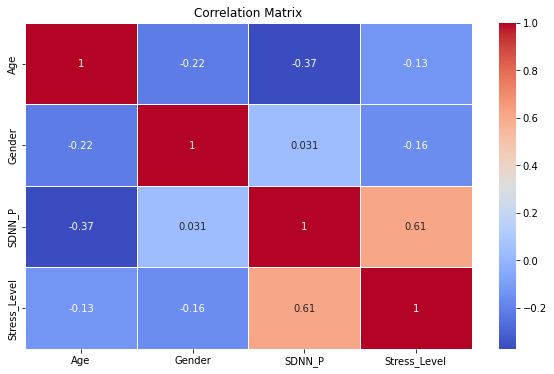

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Seperating Data labels for training


In [23]:
X = dataframe[['Age', 'Gender', 'SDNN_P']]
Y = dataframe['Stress_Level']

Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [25]:
training_data =  X_train, Y_train

In [30]:
svm_model(X_train, Y_train)
logistic_regression_model(X_train, Y_train)
random_forest_model(X_train, Y_train)
lstm_model(X_train, Y_train)

TypeError: svm_model() takes 1 positional argument but 2 were given